# Einstein Tensor calculations using Symbolic module

In [2]:
import sympy
import matplotlib.pyplot as plt
import numpy as np

from sympy import symbols, sin, cos, sinh
from einsteinpy.symbolic import EinsteinTensor, MetricTensor, WeylTensor

sympy.init_printing()

### Defining our time dependent metric as from equation 31
https://docs.einsteinpy.org/en/latest/examples/Symbolically%20Understanding%20Christoffel%20Symbol%20and%20Riemann%20Curvature%20Tensor%20using%20EinsteinPy.html

https://en.wikipedia.org/wiki/Vaidya_metric

In [6]:
syms = sympy.symbols("t r theta phi")
G, M, c, a, w = sympy.symbols("G M c a w")
a = M*((sin(w*syms[0]))**2)
print(a)
# using metric values of schwarschild space-time
# a is schwarzschild radius
list2d = [[0 for i in range(4)] for i in range(4)]
list2d[0][0] = (1 - (2*a / syms[1]))* (c ** 2)
list2d[0][1] = 2*sin(w*syms[0])#need to have this switch from -ve to +ve so use sin?
list2d[1][0] = 2*sin(w*syms[0])
list2d[1][1] = -1 
list2d[2][2] = -1 * (syms[1] ** 2) 
list2d[3][3] = -1 * (syms[1] ** 2) * (sympy.sin(syms[2]) ** 2)
sch = MetricTensor(list2d, syms)
sch.tensor()


M*sin(t*w)**2


⎡   ⎛         2         ⎞                              ⎤
⎢ 2 ⎜  2⋅M⋅sin (t⋅w)    ⎟                              ⎥
⎢c ⋅⎜- ───────────── + 1⎟  2⋅sin(t⋅w)   0        0     ⎥
⎢   ⎝        r          ⎠                              ⎥
⎢                                                      ⎥
⎢       2⋅sin(t⋅w)             -1       0        0     ⎥
⎢                                                      ⎥
⎢                                        2             ⎥
⎢           0                  0       -r        0     ⎥
⎢                                                      ⎥
⎢                                             2    2   ⎥
⎣           0                  0        0   -r ⋅sin (θ)⎦

### Calculating the Einstein Tensor (with both indices covariant)

In [7]:
einst = EinsteinTensor.from_metric(sch)
einst.simplify()
einst.tensor()
#components explanation EG https://physics.stackexchange.com/questions/366560/stress-energy-tensor-components-spherical-coordinates

⎡ 2 ⎛     2  2    4               2      2                   4              2 
⎢c ⋅⎝2.0⋅M ⋅c ⋅sin (t⋅w) - 1.5⋅M⋅c ⋅r⋅sin (t⋅w) - 2.0⋅M⋅r⋅sin (t⋅w) + 0.25⋅c ⋅
⎢─────────────────────────────────────────────────────────────────────────────
⎢                                                                             
⎢                                    2 ⎛         2    2              2        
⎢                                   r ⋅⎝- 0.5⋅M⋅c ⋅sin (t⋅w) + 0.25⋅c ⋅r + 1.0
⎢                                                                             
⎢               ⎛          2    4             2  2                   2      2 
⎢               ⎝- 32.0⋅M⋅c ⋅sin (t⋅w) + 8.0⋅c ⋅r ⋅w⋅cos(t⋅w) + 8.0⋅c ⋅r⋅sin (
⎢               ──────────────────────────────────────────────────────────────
⎢                                                                             
⎢                                          ⎛       2    2         2           
⎢                                        r⋅⎝- 2⋅M⋅c 

In [8]:
# what is the Weyl tensor?
#weyl = WeylTensor.from_metric(sch)
#weyl.tensor() # all components!

(t, r, theta, phi, M, c, w)


Text(0.5, 1.0, 'T_01')

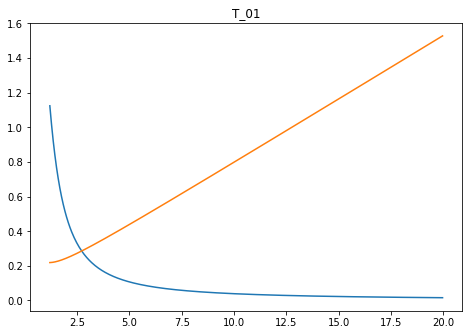

In [13]:
###Plot something
# first make the tensor into a function, printing 
args, func = einst.tensor_lambdify()
print(args) # these are the argument values 

#Make x values - which we will sub in for r 
x = np.arange(1.2, 20.0, 0.04)
func(0.5,x,0, 0, 1, 1, 1)[0][1]

# Call the functions
y = func(1.0,x,1, 1, 1, 1, 1)[0][1]
z = -func(1.0,x,1, 1, 1, 1, 1)[2][2] # 0.1 to bring scale in
fig=plt.figure()
ax=fig.add_axes([0,2,1.0,1.0])
ax.plot(x,y)
ax.plot(x,z)
ax.set_title("T_01")


